In [ ]:
import requests

# Replace these with your actual API keys
OPENWEATHER_API_KEY = '8407cb6677f41d255f58a5d6789b601e'
TOMTOM_API_KEY = 'VLY170Ef4AqkV1nn8e6ffqFt0aXPwMq0'

# === Geocoding API Call ===
def get_coordinates(city_name):
    url = f"https://api.tomtom.com/search/2/geocode/{city_name}.json?key={TOMTOM_API_KEY}"
    response = requests.get(url)
    data = response.json()

    if response.status_code != 200 or "results" not in data or len(data["results"]) == 0:
        print(f"Error fetching coordinates for {city_name}")
        return None

    position = data["results"][0]["position"]
    return position["lat"], position["lon"]

# === Weather API Call ===
def get_weather_data(lat, lon):
    url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={OPENWEATHER_API_KEY}&units=metric"
    response = requests.get(url)
    data = response.json()

    if response.status_code != 200:
        print(f"Error fetching weather data: {data.get('message', 'Unknown error')}")
        return None

    if "main" in data and "weather" in data and len(data["weather"]) > 0:
        weather_info = {
            "temperature": data["main"]["temp"],
            "visibility": data.get("visibility"),
            "weather_condition": data["weather"][0]["description"],
            "humidity": data["main"]["humidity"],
            "wind_speed": data["wind"][""]
        }
        return weather_info
    else:
        print("Error: Unexpected weather data format.")
        return None

# === Traffic API Call ===
def get_traffic_data(lat, lon):
    url = f"https://api.tomtom.com/traffic/services/4/flowSegmentData/relative0/10/json?point={lat},{lon}&key={TOMTOM_API_KEY}"
    response = requests.get(url)
    data = response.json()

    if response.status_code != 200:
        print(f"Error fetching traffic data: {data.get('message', 'Unknown error')}")
        return None

    if "flowSegmentData" in data:
        traffic_info = {
            "current_speed": data["flowSegmentData"].get("currentSpeed"),
            "free_flow_speed": data["flowSegmentData"].get("freeFlowSpeed"),
            "congestion_level": None
        }
        if data["flowSegmentData"].get("currentTravelTime") is not None and \
           data["flowSegmentData"].get("freeFlowTravelTime") is not None and \
           data["flowSegmentData"]["freeFlowTravelTime"] != 0:
            traffic_info["congestion_level"] = round(
                data["flowSegmentData"]["currentTravelTime"] / data["flowSegmentData"]["freeFlowTravelTime"], 2
            )

        return traffic_info
    else:
        print("Error: Unexpected traffic data format.")
        return None

# === Cities to Test ===
cities = ["Bangalore", "Chennai", "Mumbai", "Delhi", "Hyderabad", "Pune", "Indore","Hosur","Villupuram","Kolkata","Lucknow","Jaipur","Coimbatore","Thiruvananthapuram","Nagpur","Kanchipuram" ,"Kanyakumari","Karaikudi","Karur","Erode","Madurai","Mysuru","Nellore","Ooty","Rameswaram"
"Jaipur","Agra","Visakhapatnam","Tirupati","Vijayawada","Kochi","Surat","Tiruppur","Puducherry","Thoothukudi","Nagarcoil","Thanjavur","Pallavaram","Vellore","Salem","Tiruchirappalli","Cuddalore","Dindigul","Neyveli","Arcot","Thiruvarur","Ranipet","Panruti"]

# === Loop Through Cities ===
for city in cities:
    print(f"\n🔍 Fetching data for: {city}")
    coords = get_coordinates(city)

    if not coords:
        print("⚠️ Skipping due to missing coordinates.")
        continue

    lat, lon = coords
    print(f"📍 Coordinates: {lat}, {lon}")

    weather = get_weather_data(lat, lon)
    traffic = get_traffic_data(lat, lon)

    if weather:
        print("Weather Info:", weather)
    else:
        print("Failed to fetch weather data.")

    if traffic:
        print(" Traffic Info:", traffic)
    else:
        print(" Failed to fetch traffic data.")


🔍 Fetching data for: Bangalore
📍 Coordinates: 12.9767463, 77.5752782
Weather Info: {'temperature': 26.45, 'visibility': 6000, 'weather_condition': 'scattered clouds', 'humidity': 75, 'wind_speed': 4.12}
 Traffic Info: {'current_speed': 10, 'free_flow_speed': 19, 'congestion_level': 1.9}

🔍 Fetching data for: Chennai
📍 Coordinates: 13.0720922, 80.2018554
Weather Info: {'temperature': 32.89, 'visibility': 10000, 'weather_condition': 'overcast clouds', 'humidity': 72, 'wind_speed': 3.13}
 Traffic Info: {'current_speed': 23, 'free_flow_speed': 23, 'congestion_level': 1.0}

🔍 Fetching data for: Mumbai
📍 Coordinates: 18.9690472, 72.8211807
Weather Info: {'temperature': 28.01, 'visibility': 3000, 'weather_condition': 'light intensity drizzle', 'humidity': 74, 'wind_speed': 1.54}
 Traffic Info: {'current_speed': 17, 'free_flow_speed': 23, 'congestion_level': 1.35}

🔍 Fetching data for: Delhi
📍 Coordinates: 28.6324252, 77.218791
Weather Info: {'temperature': 35.07, 'visibility': 6000, 'weather

Load dataset,define accident risk rules,apply the risk labelling function,.....

Data loading and Preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

# Load your dataset CSV file (adjust filename if needed)
df = pd.read_csv('/content/weather_traffic_data.csv')

# Function to assign accident risk label based on given rules
def assign_accident_risk(row):
    bad_weather = ['thunderstorm', 'haze', 'mist', 'fog', 'rain']
    if (row['congestion_level'] > 1.4 and
        row['visibility'] < 5000 and
        row['weather_condition'] in bad_weather):
        return 'High'
    elif (1.0 < row['congestion_level'] <= 1.4 and
          5000 <= row['visibility'] <= 10000):
        return 'Medium'
    else:
        return 'Low'

# Apply function to create target label column
df['accident_risk'] = df.apply(assign_accident_risk, axis=1)

# Encode categorical features and target variable
le_weather = LabelEncoder()
df['weather_condition_encoded'] = le_weather.fit_transform(df['weather_condition'])
le_risk = LabelEncoder()
df['accident_risk_encoded'] = le_risk.fit_transform(df['accident_risk'])

# Features for training
feature_cols = ['temperature', 'visibility', 'humidity', 'wind_speed',
                'current_speed', 'free_flow_speed', 'congestion_level',
                'weather_condition_encoded']

X = df[feature_cols]
y = df['accident_risk_encoded']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Initialize and train Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Save the trained model and label encoders for future use
joblib.dump(model, 'accident_risk_model.pkl')
joblib.dump(le_weather, 'weather_label_encoder.pkl')
joblib.dump(le_risk, 'risk_label_encoder.pkl')

Model Accuracy: 1.00


['risk_label_encoder.pkl']

Steps inside the function:

Encodes the weather condition

Formats the input into a DataFrame

Predicts accident risk using the trained model

Decodes the predicted risk back to a readable label (Low, Medium, High

Loading model and making Predictions on the new data

In [ ]:
import pandas as pd
import joblib

# Load dataset
df = pd.read_csv('/content/weather_traffic_data.csv')

print("Dataset loaded, sample:")
print(df.head())  # Show first 5 rows as sample

cities = df['city'].unique()
print("\nCities:")
print(cities)

# Load saved encoders and model
le_weather = joblib.load('/content/weather_label_encoder.pkl')
le_risk = joblib.load('/content/risk_label_encoder.pkl')
model = joblib.load('/content/accident_risk_model.pkl')

def predict_accident_risk(row):
    """
    row: pandas Series with columns
        temperature, visibility, humidity, wind_speed,
        current_speed, free_flow_speed, congestion_level,
        weather_condition
    """
    # Encode weather_condition
    try:
        weather_encoded = le_weather.transform([row['weather_condition']])[0]
    except ValueError:
        print(f"Unknown weather condition: {row['weather_condition']}. Please check spelling or train with new categories.")
        return None

    features = pd.DataFrame([{
        'temperature': row['temperature'],
        'visibility': row['visibility'],
        'humidity': row['humidity'],
        'wind_speed': row['wind_speed'],
        'current_speed': row['current_speed'],
        'free_flow_speed': row['free_flow_speed'],
        'congestion_level': row['congestion_level'],
        'weather_condition_encoded': weather_encoded
    }])

    pred_encoded = model.predict(features)[0]
    pred_label = le_risk.inverse_transform([pred_encoded])[0]
    return pred_label

print("\nPredicted Accident Risks by City:\n")

for city in cities:
    city_data = df[df['city'] == city].iloc[0]  # Take the first row for the city
    risk = predict_accident_risk(city_data)
    print(f"City: {city}")
    print(f"  Temperature: {city_data['temperature']}")
    print(f"  Visibility: {city_data['visibility']}")
    print(f"  Humidity: {city_data['humidity']}")
    print(f"  Wind Speed: {city_data['wind_speed']}")
    print(f"  Current Speed: {city_data['current_speed']}")
    print(f"  Free Flow Speed: {city_data['free_flow_speed']}")
    print(f"  Congestion Level: {city_data['congestion_level']}")
    print(f"  Weather Condition: {city_data['weather_condition']}")
    print(f"  Predicted Accident Risk: {risk}")
    print("---")


Dataset loaded, sample:
        city        lat        lon  temperature  visibility  \
0  Bangalore  12.976746  77.575278        26.45        6000   
1    Chennai  13.072092  80.201855        32.89       10000   
2     Mumbai  18.969047  72.821181        28.01        3000   
3      Delhi  28.632425  77.218791        35.07        6000   
4  Hyderabad  17.361719  78.475169        30.19        6000   

         weather_condition  humidity  wind_speed  current_speed  \
0         scattered clouds        75        4.12             10   
1          overcast clouds        72        3.13             23   
2  light intensity drizzle        74        1.54             17   
3                clear sky        43        4.63             17   
4         scattered clouds        54        4.12              7   

   free_flow_speed  congestion_level  
0               19              1.90  
1               23              1.00  
2               23              1.60  
3               23              1.35  

Model evalution metrics

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

known_labels = [1, 2]  # Replace with all your class labels

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, labels=known_labels, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred, labels=[1,2]))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       0.50      0.50      0.50        10
weighted avg       1.00      1.00      1.00        10

Confusion Matrix:
 [[ 0  0]
 [ 0 10]]


Confusion matrix Heatmap visualization

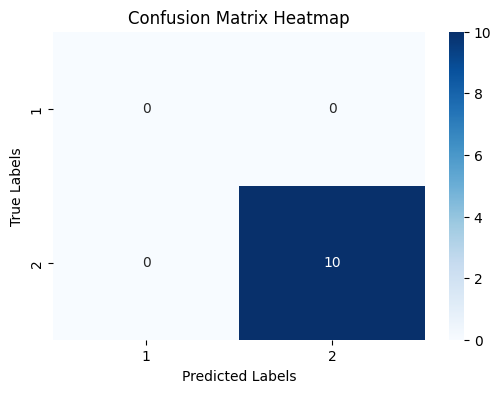

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix with your known labels
cm = confusion_matrix(y_test, y_pred, labels=[1, 2])

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[1, 2], yticklabels=[1, 2])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [ ]:
import joblib
joblib.dump(model, "ml_model.pkl")
print(model)


RandomForestClassifier(random_state=42)


GEN AI

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import re

# Load and preprocess the text
with open("/content/rules.txt", "r") as f:
    text = f.read().lower()

# Clean and tokenize the text into words
text = re.sub(r"[^a-zA-Z0-9\s.,!?]", "", text)

words = text.split()
vocab = sorted(set(words))
word_to_idx = {w: i for i, w in enumerate(vocab)}
idx_to_word = {i: w for w, i in word_to_idx.items()}
vocab_size = len(vocab)

# Convert words to indices
data = [word_to_idx[w] for w in words]
data = torch.tensor(data, dtype=torch.long)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
class WordLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim=128, hidden_dim=256, n_layers=2):
        super(WordLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.lstm(embedded)
        return self.fc(output)


In [ ]:
model = WordLSTM(vocab_size)
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)
criterion = nn.CrossEntropyLoss()

seq_length = 10
num_epochs = 100

for epoch in range(num_epochs):
    total_loss = 0
    for i in range(len(data) - seq_length):
        input_seq = data[i:i+seq_length].unsqueeze(0)
        target_seq = data[i+1:i+seq_length+1].unsqueeze(0)

        output = model(input_seq)
        loss = criterion(output.view(-1, vocab_size), target_seq.view(-1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    if epoch % 10 == 0:
        print(f"Epoch {epoch} | Loss: {total_loss:.4f}")


Epoch 0 | Loss: 2784.6240
Epoch 10 | Loss: 91.3821
Epoch 20 | Loss: 84.0643
Epoch 30 | Loss: 71.1310
Epoch 40 | Loss: 68.8324
Epoch 50 | Loss: 64.4193
Epoch 60 | Loss: 61.8754
Epoch 70 | Loss: 62.2567
Epoch 80 | Loss: 60.2967
Epoch 90 | Loss: 65.6297


In [ ]:
import joblib
torch.save(model.state_dict(), "word_lstm_model_state.pth")
joblib.dump(word_to_idx, "word_to_idx.pkl")
joblib.dump(idx_to_word, "idx_to_word.pkl")
print("Model and vocabulary saved.")

Model and vocabulary saved.


In [ ]:
# --- Load the saved vocabulary and model state ---
import joblib
import torch
import torch.nn as nn # Make sure nn is imported here as well

try:
    word_to_idx = joblib.load("word_to_idx.pkl")
    idx_to_word = joblib.load("idx_to_word.pkl")
    vocab_size = len(word_to_idx)

    # Ensure the WordLSTM class is defined (it should be in a preceding cell)
    # Re-instantiate the model with the correct vocab_size and other parameters
    # Explicitly pass the dimensions used during training
    embedding_dim = 128 # Define the embedding dimension
    hidden_dim = 256  # Define the hidden dimension
    n_layers = 2      # Define the number of layers

    model = WordLSTM(vocab_size, embedding_dim, hidden_dim, n_layers)
    model.load_state_dict(torch.load("word_lstm_model_state.pth"))
    model.eval() # Set model to evaluation mode

    print("Vocabulary and model loaded successfully.")
    print(f"Loaded Vocabulary Size: {vocab_size}")
    if idx_to_word:
        max_idx = max(idx_to_word.keys())
        print(f"Maximum index in loaded idx_to_word: {max_idx}")
    else:
        print("Loaded idx_to_word is empty.")

except FileNotFoundError:
    print("Error: Model or vocabulary files not found. Please run the training cell first.")
    # You might want to exit or handle this case appropriately
    # For now, we'll just print and continue, but generation will fail
    exit() # Exit to prevent errors if files aren't loaded

# Assuming seq_length is defined in a preceding cell (e.g., ipython-input-4)
# If not, define it here based on your training setup
# seq_length = 5


def generate_advice(seed_text, num_words=50, temperature=1.0):
    model.eval()
    seed_words = seed_text.lower().split()
    # Ensure seed words are in vocabulary, map to <UNK> index if available, else 0
    # Use the loaded word_to_idx

    # Add a check for '<unk>' key before trying to access it
    unk_index = word_to_idx.get('<unk>', 0)
    input_indices = [word_to_idx.get(w, unk_index) for w in seed_words[-seq_length:]]


    # Pad input sequence if shorter than seq_length (using 0 for padding)
    if len(input_indices) < seq_length:
        input_indices = [0] * (seq_length - len(input_indices)) + input_indices

    input_seq = torch.tensor(input_indices, dtype=torch.long).unsqueeze(0)


    generated = seed_words[:]
    with torch.no_grad():
        for _ in range(num_words):
            output = model(input_seq)
            logits = output[:, -1, :]
            probs = torch.softmax(logits / temperature, dim=-1)

            # Sample next word index
            next_word_idx = torch.multinomial(probs[0], 1).item()

            # This check should now be less necessary if the loaded model
            # and vocabulary are consistent, but it's good practice.
            # Ensure the predicted index is within the valid range of the loaded idx_to_word
            if next_word_idx >= len(idx_to_word):
                 print(f"Warning: Model predicted index {next_word_idx} >= dictionary size {len(idx_to_word)}. Using index 0.")
                 next_word_idx = 0 # Fallback - using index 0 which might be <PAD> or another valid word

            # Use the loaded idx_to_word
            next_word = idx_to_word[next_word_idx]

            generated.append(next_word)
            next_input = torch.tensor([[next_word_idx]], dtype=torch.long)
            input_seq = torch.cat([input_seq[:, 1:], next_input], dim=1)

    return ' '.join(generated)

# Example
# Make sure seq_length is defined before calling generate_advice
# Assuming seq_length = 5 from the training cell (ipython-input-4)
# If you're running this cell independently, define it here:
# seq_length = 5



Vocabulary and model loaded successfully.
Loaded Vocabulary Size: 280
Maximum index in loaded idx_to_word: 279


In [ ]:

generated_text = generate_advice("fog", num_words=40)

# Add full stops and cleanup
def add_fullstops(text):
    text = re.sub(r'(?<![.!?])\b(terrain|vehicle|drugs|dangerous|seats)\b', r'\1.', text)
    text = re.sub(r'(^|\.\s+)([a-z])', lambda m: m.group(1) + m.group(2).upper(), text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

cleaned_text = add_fullstops(generated_text)
print(cleaned_text)



Fog drive through running water on roads. Always obey traffic signals, even if the road appears clear. Use your horn only to alert others, not to express frustration. Watch for motorcycles and bicycles before opening car doors. Drive slower in residential


In [ ]:
print(generated_text)

fog drive through running water on roads. always obey traffic signals, even if the road appears clear. use your horn only to alert others, not to express frustration. watch for motorcycles and bicycles before opening car doors. drive slower in residential


In [ ]:
!pip install gTTS
from gtts import gTTS
from IPython.display import Audio
tts = gTTS(cleaned_text)
tts.save("advice.wav")
Audio("advice.wav")



In [ ]:
torch.save(model.state_dict(), "genai_model.pth")
joblib.dump(word_to_idx, "word_to_idx.pkl")
joblib.dump(idx_to_word, "idx_to_word.pkl")

['idx_to_word.pkl']